In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


from tensorflow.keras.metrics import Precision, Recall

from tensorflow.keras.callbacks import ModelCheckpoint


#from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
#from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score
#from sklearn.metrics import precision_recall_curve, average_precision_score


In [6]:
from modules.data_exploration.data_ex import import_data, gen_bulk_data, get_bulk_inst

In [7]:
file_path = 'data/churn.csv'
data_dict = gen_bulk_data(file_path)
data_dict.keys()

dict_keys(['original', 'dropped', 'scaled', 'encoded', 'encoded and scaled', 'scaled and dropped'])

In [8]:
key = 'original'

x_train, x_test, x_val, y_train, y_test, y_val = get_bulk_inst(data_dict, key)

In [9]:
#x_train.drop(columns=['index'], inplace=True)
#x_test.drop(columns=['index'], inplace=True)
x_train

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,45,103,415,4107,0,0,0,230.2,100,39.13,174.1,100,14.80,194.1,112,8.73,9.0,11,2.43,2
1,19,192,510,2236,0,0,0,174.5,83,29.67,232.7,102,19.78,101.5,68,4.57,12.4,4,3.35,1
2,34,171,415,4499,0,0,0,137.5,110,23.38,198.1,109,16.84,292.7,131,13.17,13.3,5,3.59,2
3,31,80,415,144,0,0,0,268.7,120,45.68,301.0,147,25.59,167.0,140,7.52,5.8,1,1.57,2
4,11,134,415,808,0,1,38,214.4,93,36.45,211.7,57,17.99,165.0,79,7.43,10.0,8,2.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,50,142,408,2754,0,1,34,219.5,85,37.32,144.0,120,12.24,258.2,84,11.62,7.0,3,1.89,1
3496,23,85,415,1856,0,0,0,255.3,114,43.40,194.6,83,16.54,276.6,78,12.45,3.7,5,1.00,3
3497,21,105,510,1312,0,0,0,212.0,113,36.04,226.6,128,19.26,193.6,114,8.71,8.9,7,2.40,3
3498,33,121,408,4839,0,1,44,116.0,85,19.72,150.1,120,12.76,246.8,98,11.11,12.0,2,3.24,1


In [6]:
from keras.utils import to_categorical 
import numpy as np

y_train_cat = to_categorical(y_train)

type(y_train_cat)
print(y_train_cat.shape)
print(x_train.shape)



#for i in range(len(y_train_cat)):
#    print(y_train_cat[i])


(3500, 2)
(3500, 20)


In [7]:
input_shape = len(x_train.columns)


model = tf.keras.models.Sequential() # model instance

# accuracy: 0.8890
#model.add(tf.keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.5))
#model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.5))

# accuracy: 0.915
#model.add(tf.keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
#model.add(tf.keras.layers.Dense(8, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))

# accuracy: xx
model.add(tf.keras.layers.Dense(input_shape, input_shape=(input_shape,), activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
#model.add(tf.keras.layers.Dense(64, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))
#model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.2))

model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # output layer with 2 classes to clasify
model.summary() # architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                420       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                672       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss='binary_crossentropy',
    #loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(0.0005),
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.TruePositives()])

In [9]:
epo = 50

CB_checkpoint = ModelCheckpoint(monitor='val_true_positives', filepath='model.hdf5', save_best_only=True, verbose=1)


history = model.fit(x_train, y_train, epochs=epo, validation_split=0.2, callbacks=[CB_checkpoint], verbose=0)


Epoch 00001: val_true_positives improved from inf to 26.00000, saving model to model.hdf5

Epoch 00002: val_true_positives improved from 26.00000 to 6.00000, saving model to model.hdf5

Epoch 00003: val_true_positives did not improve from 6.00000

Epoch 00004: val_true_positives improved from 6.00000 to 2.00000, saving model to model.hdf5

Epoch 00005: val_true_positives did not improve from 2.00000

Epoch 00006: val_true_positives did not improve from 2.00000

Epoch 00007: val_true_positives did not improve from 2.00000

Epoch 00008: val_true_positives did not improve from 2.00000

Epoch 00009: val_true_positives did not improve from 2.00000

Epoch 00010: val_true_positives did not improve from 2.00000

Epoch 00011: val_true_positives did not improve from 2.00000

Epoch 00012: val_true_positives did not improve from 2.00000

Epoch 00013: val_true_positives did not improve from 2.00000

Epoch 00014: val_true_positives did not improve from 2.00000

Epoch 00015: val_true_positives did n

In [10]:
#model.load_weights('model.hdf5')
model.evaluate(x_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.7095 - accuracy: 0.8640 - precision: 0.7500 - recall: 0.0566 - true_positives: 6.0000        


[0.7095096111297607, 0.8640000224113464, 0.75, 0.056603774428367615, 6.0]

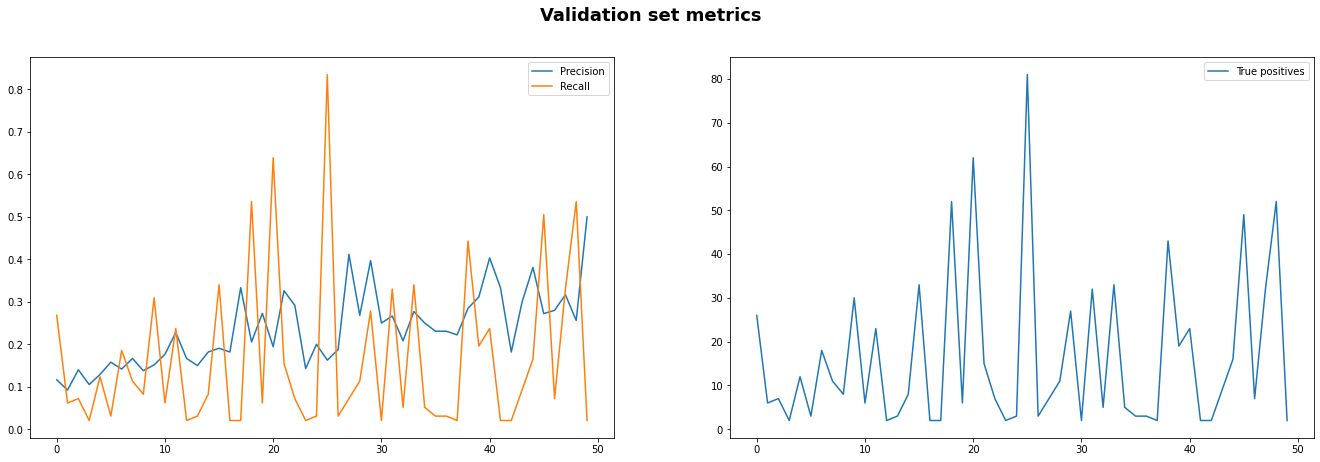

In [11]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(23, 7))

#plt.plot(history.history['accuracy'], label='train set accuracy')
#plt.plot(history.history['val_accuracy'], label='validation set accuracy')
ax1.plot(history.history['val_precision'], label='Precision')
ax1.plot(history.history['val_recall'], label='Recall')

ax2.plot(history.history['val_true_positives'], label='True positives')

plt.suptitle('Validation set metrics', fontsize=18, fontweight='bold')
#plt.xticks(range(epo))
ax1.legend()
ax2.legend()
plt.show()

In [12]:
y_pred = model.predict(x_test)
y_pred

array([[3.26113513e-04],
       [9.36180659e-05],
       [1.44400327e-02],
       [2.64669284e-02],
       [7.39548414e-05],
       [8.96035577e-04],
       [3.84166315e-02],
       [8.95729638e-04],
       [1.24155846e-03],
       [2.56699082e-02],
       [2.07311008e-03],
       [8.79887899e-04],
       [1.79652527e-01],
       [4.65862872e-03],
       [7.74586515e-05],
       [1.40140086e-01],
       [6.81176223e-03],
       [2.56153825e-03],
       [2.52755068e-04],
       [1.68998857e-04],
       [1.95790012e-03],
       [4.46400000e-03],
       [2.64855043e-04],
       [1.70231870e-04],
       [8.85943300e-05],
       [5.58412052e-04],
       [1.35708284e-02],
       [1.97412749e-03],
       [2.84372456e-02],
       [1.59042934e-03],
       [4.12096677e-04],
       [5.14894273e-05],
       [8.72945064e-04],
       [1.33317517e-04],
       [5.02495289e-01],
       [1.44236749e-02],
       [1.04712304e-02],
       [5.08725294e-04],
       [1.09345812e-04],
       [1.58533044e-02],


In [13]:
import numpy as np

threshold = 0.5
y_pred_thres = np.where(y_pred<=threshold, 0, 1)



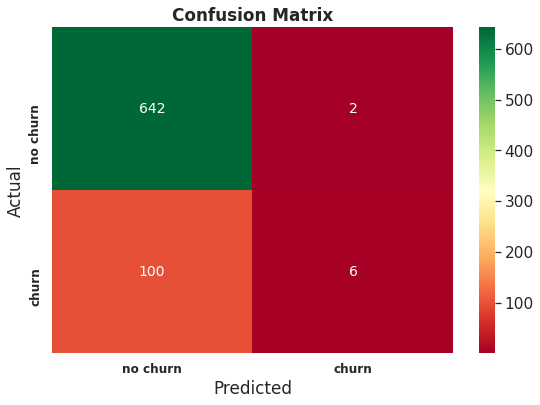

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

data = confusion_matrix(y_test, y_pred_thres)
df_cm = pd.DataFrame(data, columns=['no churn', 'churn'], index=['no churn', 'churn'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize=(9, 6))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, cmap='RdYlGn', annot=True, annot_kws={"size": 14}, fmt='d')
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

Epoch 1/20
110/110 [==============================] - 0s 3ms/step - loss: 28.5632 - accuracy: 0.8000 - val_loss: 0.6970 - val_accuracy: 0.8587
Epoch 2/20
110/110 [==============================] - 0s 2ms/step - loss: 3.3514 - accuracy: 0.8486 - val_loss: 0.6647 - val_accuracy: 0.8587
Epoch 3/20
110/110 [==============================] - 0s 3ms/step - loss: 1.9616 - accuracy: 0.8560 - val_loss: 0.6400 - val_accuracy: 0.8587
Epoch 4/20
110/110 [==============================] - 0s 2ms/step - loss: 1.2584 - accuracy: 0.8543 - val_loss: 0.6208 - val_accuracy: 0.8587
Epoch 5/20
110/110 [==============================] - 0s 2ms/step - loss: 0.9166 - accuracy: 0.8560 - val_loss: 0.6056 - val_accuracy: 0.8587
Epoch 6/20
110/110 [==============================] - 0s 2ms/step - loss: 1.1320 - accuracy: 0.8574 - val_loss: 0.5928 - val_accuracy: 0.8587
Epoch 7/20
110/110 [==============================] - 0s 2ms/step - loss: 1.0287 - accuracy: 0.8569 - val_loss: 0.5819 - val_accuracy: 0.8587
Epoch

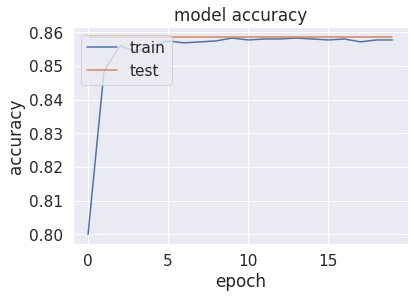

In [15]:
epochs = 20



model = Sequential()
model.add(Dense(64,kernel_regularizer=tf.keras.regularizers.l2(0.001), input_shape=(input_shape,), activation='relu' ))
model.add(Dropout(rate=0.4))
model.add(Dense(8,kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='relu'))
model.add(Dropout(rate=0.4))
model.add(Dense(1, activation='sigmoid'))
lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay( 0.001,
      decay_steps=(x_train.shape[0]/32)*5,
      decay_rate=1,
      staircase=False)

#This time decay means for every 5 epochs the learning rate will be half of 0.001 value
def get_optimizer():
    return tf.keras.optimizers.Adam(lr_schedule)

def get_callbacks():
    return [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=70,restore_best_weights=True)]


model.compile(loss = "binary_crossentropy", 
                  optimizer = get_optimizer(), 
                  metrics=['accuracy'])
    

    
    
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs, callbacks=get_callbacks())#, verbose=0)

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.title('model accuracy') 
plt.ylabel('accuracy')
plt.xlabel('epoch') 
plt.legend(['train', 'test'], loc='upper left') 
plt.show()

Predicted,no churn,churn
Actual,,
no churn,1.0,0.0
churn,1.0,0.0


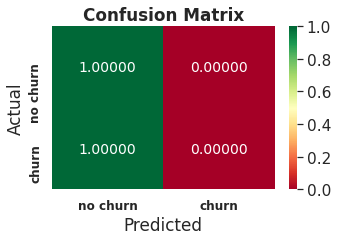


Classification report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       644
           1       0.00      0.00      0.00       106

    accuracy                           0.86       750
   macro avg       0.43      0.50      0.46       750
weighted avg       0.74      0.86      0.79       750



/home/tobias/anaconda3/envs/tobias/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

y_pred = model.predict(x_test)
threshold = 0.5
y_pred = np.where(y_pred<=threshold, 0, 1)


normalize='true'

if normalize == 'true':
    format = '.5f'
else:
    format = 'd'
    
# calculate confusion matrix
data = confusion_matrix(y_test, y_pred, normalize=normalize)
df_cm = pd.DataFrame(data, columns=['no churn', 'churn'], index=['no churn', 'churn'])
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

# print dataframe
display(df_cm)

# plot
plt.figure(figsize=(5,3))
sns.set(font_scale=1.4)  # for label size
sns.heatmap(df_cm, cmap='RdYlGn', annot=True, annot_kws={"size": 14}, fmt=format)
plt.title("Confusion Matrix", fontweight='bold')
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.show()

print("\nClassification report:\n", classification_report(y_test, y_pred))

In [1]:
from modules.build_ml_models.NN_classification import build_model, build_model_seq

B_model = build_model_seq(input_shape=20, hidden_shapes=[20,32], hidden_activation='relu',
                    opt='adam', dropout=0.0, loss='binary_crossentropy')

In [2]:
B_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer_0 (Dense)       (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
hidden_layer_1 (Dense)       (None, 32)                672       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
output_layer (Dense)         (None, 1)                 33        
Total params: 1,125
Trainable params: 1,125
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs = 50
history = B_model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=epochs)#, callbacks=get_callbacks())#, verbose=0)

Epoch 1/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6664 - accuracy: 0.8211 - val_loss: 0.3919 - val_accuracy: 0.8733
Epoch 2/50
110/110 [==============================] - 0s 2ms/step - loss: 0.5279 - accuracy: 0.8246 - val_loss: 0.3721 - val_accuracy: 0.8600
Epoch 3/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6403 - accuracy: 0.8240 - val_loss: 0.5147 - val_accuracy: 0.8373
Epoch 4/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6618 - accuracy: 0.8137 - val_loss: 0.3656 - val_accuracy: 0.8707
Epoch 5/50
110/110 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.8286 - val_loss: 0.3996 - val_accuracy: 0.8640
Epoch 6/50
110/110 [==============================] - 0s 2ms/step - loss: 0.6414 - accuracy: 0.8203 - val_loss: 0.5271 - val_accuracy: 0.8613
Epoch 7/50
110/110 [==============================] - 0s 2ms/step - loss: 0.5036 - accuracy: 0.8380 - val_loss: 0.6176 - val_accuracy: 0.8627
Epoch 